# 0.) Import and Clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Country-data.csv", sep = ",")

In [3]:
features = df.drop('country', axis=1)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 1.) Fit a kmeans Model with any Number of Clusters

In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_scaled)

/Users/santiagonaranjo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [5]:
df['cluster'] = kmeans.labels_

# 2.) Pick two features to visualize across

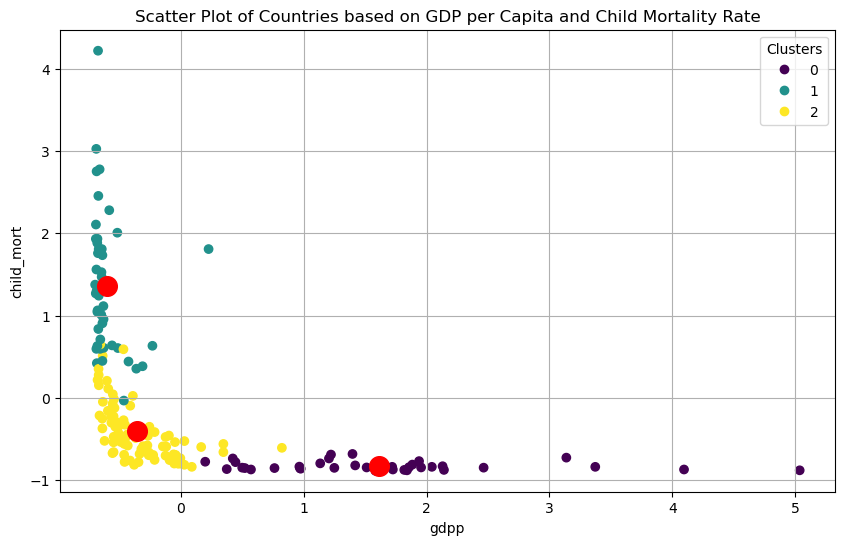

In [6]:
x1_index = features.columns.get_loc("gdpp")  
x2_index = features.columns.get_loc("child_mort")  

plt.figure(figsize=(10, 6))
scatter = plt.scatter(features_scaled[:, x1_index], features_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='red', s=200, label='Centers')

plt.xlabel(features.columns[x1_index])
plt.ylabel(features.columns[x2_index])
plt.title('Scatter Plot of Countries based on GDP per Capita and Child Mortality Rate')

plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [7]:
k_values = range(1, 11)  
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=30, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)  



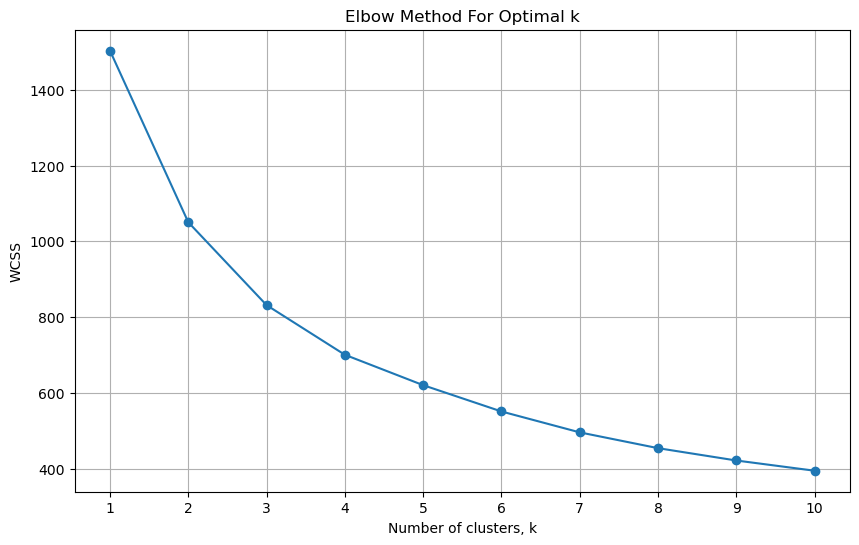

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, '-o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

The analysis of the previous graph leads to the consideration of either three or four as the optimal number of clusters for grouping countries based on their economic indicators. However, further examination, including a scatter plot analysis and economic reasoning, strongly supports the selection of three clusters. This choice aligns with the traditional economic division of countries into low, medium, and high income categories, providing a clear and practical framework for analysis. Opting for three clusters simplifies the categorization and makes it more relevant for understanding global economic patterns, making it the more logical choice over four clusters.

# 6.) Do the same for a silhoutte plot

In [9]:
from sklearn.metrics import silhouette_score

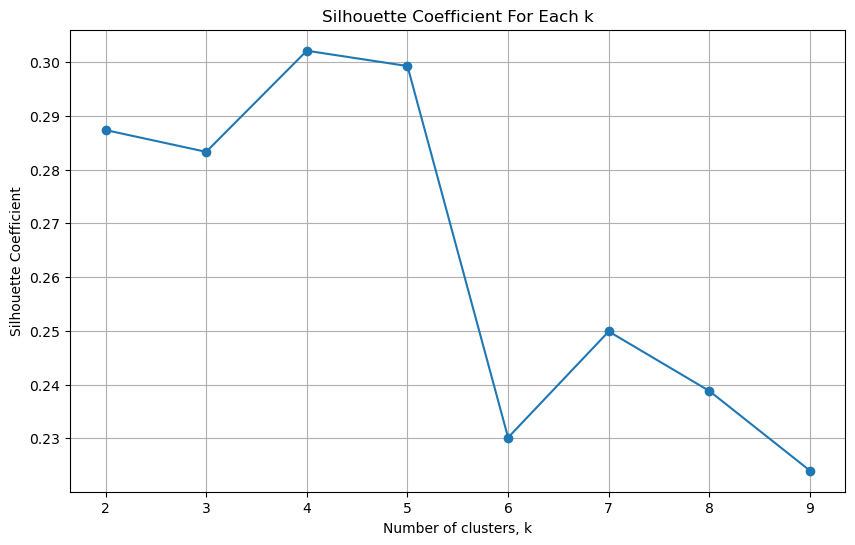

In [10]:
k_values = range(2, 10)  
silhouette_coefficients = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=30, random_state=42)
    kmeans.fit(features_scaled)
    score = silhouette_score(features_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)


plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_coefficients, '-o')
plt.title('Silhouette Coefficient For Each k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Coefficient')
plt.xticks(k_values)
plt.grid(True)
plt.show()


# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [11]:

kmeans_optimal = KMeans(n_clusters=3, n_init=30, random_state=42)
kmeans_optimal.fit(features_scaled)

df['cluster'] = kmeans_optimal.labels_

clusters_countries = {k: df[df['cluster'] == k]['country'].tolist() for k in range(3)}

for cluster, countries in clusters_countries.items():
    print(f"Cluster {cluster}: {countries}")

Cluster 0: ['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']
Cluster 1: ['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'To

Cluster 0 includes countries with high-income economies, advanced healthcare, and education systems, such as the USA, Canada, Japan, and several European and Gulf states. This cluster signifies the top tier of global wealth and development, marked by significant technological innovation and high standards of living.

Cluster 1 is composed mainly of countries from Africa and a few from Asia and the Caribbean, like Afghanistan, Haiti, and Yemen. These countries generally have lower income levels, face political and healthcare challenges, and have lower education indices, indicating the struggles associated with lower economic development.

Cluster 2 encompasses a diverse group of middle-income countries from Latin America, Eastern Europe, and Asia, including Brazil, Poland, and China. This cluster represents economies in transition, improving in healthcare and education, and moving towards more diversified, industrial, and service-oriented economies.

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [13]:
kmeans_optimal = KMeans(n_clusters=3, n_init=30, random_state=42)
kmeans_optimal.fit(features_scaled)

centroids_scaled = kmeans_optimal.cluster_centers_

scaler = StandardScaler().fit(features)  
centroids = scaler.inverse_transform(centroids_scaled)

features_columns = features.columns 
centroids_df = pd.DataFrame(centroids, columns=features_columns)


centroids_df.index.name = 'Cluster'
centroids_df.reset_index(inplace=True)

centroids_df

,Cluster,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
1,1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,2,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381


# 9.) Write an observation about the descriptive statistics.

These observations highlight the disparities in economic conditions, healthcare, and demographic trends across different clusters of countries. Cluster 0 shows characteristics typical of developed nations, Cluster 1 of underdeveloped countries, and Cluster 2 of developing countries in transition. These distinctions underscore the varied challenges and opportunities each cluster faces, offering a framework for targeted policy-making and international support.